In [6]:
# Test multi

import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import pycuda.gpuarray as gpuarray
from pycuda import cumath
import numpy as np
from time import time
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm

from nipals.NIPALS import Nipals_GPU ,Nipals_CPU

N_ITER = 10
MIN_SIZE = 300
MAX_SIZE = 400
n_components = 2

speed ={} 

nips_gpu = Nipals_GPU(tol=0.001, maxiter=100,ncomp=n_components)
nips_cpu = Nipals_CPU(tol=0.001, maxiter=100,ncomp=n_components)

for size in tqdm(np.linspace(MIN_SIZE,MAX_SIZE,num=10, dtype=int)):
    time_cpu = np.empty(N_ITER)
    time_gpu = np.empty(N_ITER)
    for it in range(N_ITER):
        X = np.random.randn(size, size)
        ## Fit on GPU :
        t1 = time()
        nips_gpu.fit_on_GPU(X)
        t2 = time()
        time_gpu[it] = t2-t1
        ## Fit on CPU :
        t1 = time()
        nips_cpu.fit(X)
        t2 = time()
        time_cpu[it] = t2-t1
    speed[size] = {
        "mean_time_gpu": np.mean(time_gpu),
        "std_time_gpu": np.std(time_gpu),
        "mean_time_cpu": np.mean(time_cpu),
        "std_time_cpu": np.std(time_cpu),
        }

res = pd.DataFrame(speed)
res = res.transpose()
res.to_csv('result2.csv')

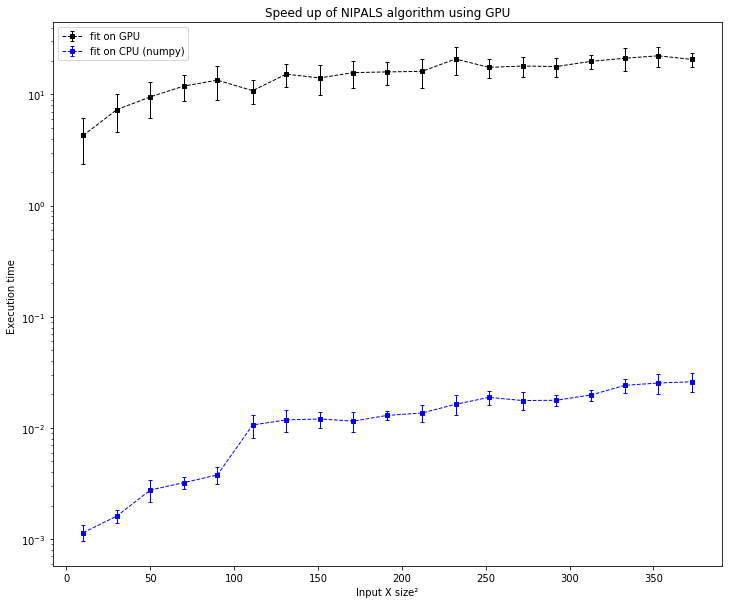

In [33]:
plt.figure(figsize=(12,10))
plt.errorbar(x= res.index,y=res.mean_time_gpu, yerr=res.std_time_gpu, 
            marker='s', capsize=2,color='black', markersize=4, linewidth=1, linestyle='--',
            label='fit on GPU')

plt.errorbar(x= res.index,y=res.mean_time_cpu, yerr=res.std_time_cpu, 
            marker='s', capsize=2,color='blue', markersize=4, linewidth=1, linestyle='--',
            label='fit on CPU (numpy)')


plt.ylabel("Execution time ")
plt.xlabel("Input X size²")
plt.yscale('log')
plt.title('Speed up of NIPALS algorithm using GPU')
plt.legend()
plt.savefig('speedup.png')

# GS PCA

In [1]:
# Test multi

import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule
import pycuda.gpuarray as gpuarray
from pycuda import cumath
import numpy as np
from time import time
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm

from GS_PCA.GSPCA import GS_PCA_CPU , GS_PCA_GPU

In [2]:
N_ITER = 10
MIN_SIZE = 400
MAX_SIZE = 1000
n_components = 2

In [ ]:
speed ={} 

for size in tqdm(np.linspace(MIN_SIZE,MAX_SIZE,num=20, dtype=int)):
    time_cpu = np.empty(N_ITER)
    time_gpu = np.empty(N_ITER)
    for it in range(N_ITER):
        X = np.random.randn(size, size)
        ## Fit on GPU :
        t1 = time()
        T, P, R, Lambda, vectL = GS_PCA_GPU(X, n=n_components, epsilon=1e-3)
        t2 = time()
        time_gpu[it] = t2-t1
        ## Fit on CPU :
        t1 = time()
        T, P, R, Lambda, vectL = GS_PCA_CPU(X, n=n_components, epsilon=1e-3)
        t2 = time()
        time_cpu[it] = t2-t1
        speed[size] = {
        "mean_time_gpu": np.mean(time_gpu),
        "std_time_gpu": np.std(time_gpu),
        "mean_time_cpu": np.mean(time_cpu),
        "std_time_cpu": np.std(time_cpu),
        }

res = pd.DataFrame(speed)
res = res.transpose()

res.to_csv('result4.csv')

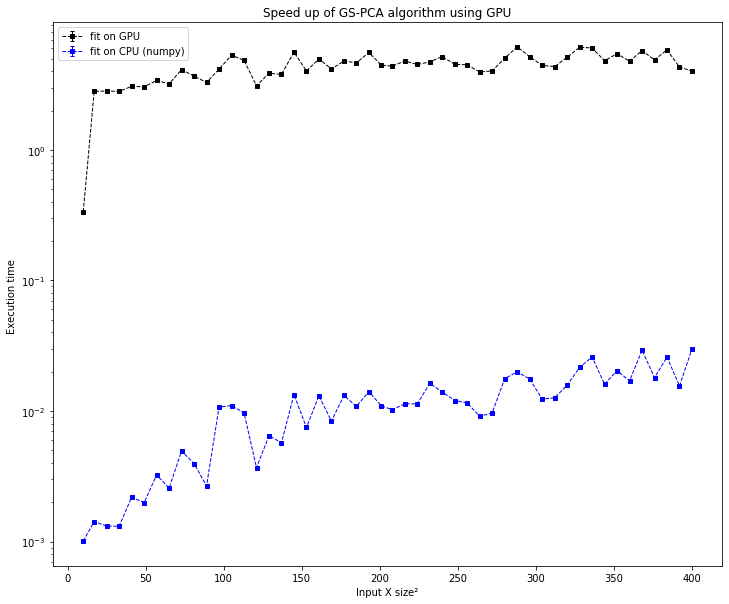

In [5]:
plt.figure(figsize=(12,10))
plt.errorbar(x= res.index,y=res.mean_time_gpu, yerr=res.std_time_gpu, 
            marker='s', capsize=2,color='black', markersize=4, linewidth=1, linestyle='--',
            label='fit on GPU')

plt.errorbar(x= res.index,y=res.mean_time_cpu, yerr=res.std_time_cpu, 
            marker='s', capsize=2,color='blue', markersize=4, linewidth=1, linestyle='--',
            label='fit on CPU (numpy)')


plt.ylabel("Execution time ")
plt.xlabel("Input X size²")
plt.yscale('log')
plt.title('Speed up of GS-PCA algorithm using GPU')
plt.legend()
plt.savefig('speedup_GSPCA_400_1000.png')